In [2]:
!pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd    
import requests as req
import matplotlib.pyplot as plt
%matplotlib inline
from citipy import citipy
import openweathermapy.core as owm
from config import api_key
import json
from random import randint

In [7]:

import pandas as pd    
import requests as req
import matplotlib.pyplot as plt
%matplotlib inline
from citipy import citipy
import openweathermapy.core as owm

# collecting the random values for the latitude between -90 degrees and 90 degrees
lat = []
for i in range(0,1500):
    i = randint(-90,90)
    lat.append(i)

#print(len(lat))
df = pd.DataFrame(lat)
df["Lat"] = df
#print(len(df["Lat"].unique()))

lon = []

# collecting the random values for the longtitude between -180 degrees and 180 degrees
for j in range(0,1500):
    j = randint(-180,180)
    lon.append(j)

#print(len(lat))
df1 = pd.DataFrame(lon)
df["Lon"] = df1

# deleting column 0 from dataframe
del df[0]

In [8]:
df = df.astype(float)

In [9]:
df.head()

,Lat,Lon
0,-1.0,-150.0
1,45.0,121.0
2,17.0,-113.0
3,-8.0,117.0
4,-85.0,72.0


In [10]:
cityname = []
countrycode = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
queryurl = []
longt = []
latit = []
id = []
unique_name = []
cityowm = []
country = []
printlog = []
newurl = []

for k in range(0,1500):
    city = citipy.nearest_city(df.iloc[k,0], df.iloc[k,1])
    name = city.city_name
    country_code = city.country_code
    cityname.append(name)
    #    unique_name.append(name)
    countrycode.append(country_code)
        
        # Save config information.
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"

    # Build the url for querying the city's weather information
    query_url = f"{url}appid={api_key}&units={units}&q={name}"
    queryurl.append(query_url)
    
              
    # Get the weather data
    response = req.get(query_url)
    response_json = response.json()
    print(f"The weather API responded with: {response_json}. ")    
        
    try:
        longt.append(response_json['coord']['lon'])
        latit.append(response_json['coord']['lat'])
        temperature.append(response_json['main']['temp']) 
        humidity.append(response_json['main']['humidity'])
        windspeed.append(response_json['wind']['speed'])
        cloudiness.append(response_json['clouds']['all'])
        id.append(response_json['id'])
        cityowm.append(response_json['name'])
        country.append(response_json['sys']['country'])
               
    except:
        print("Cod is 404!")
        
    if response_json['cod'] is 200:
        newurl.append(query_url)
              

The weather API responded with: {'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.88, 'pressure': 1027.18, 'humidity': 100, 'temp_min': 26.88, 'temp_max': 26.88, 'sea_level': 1027.22, 'grnd_level': 1027.18}, 'wind': {'speed': 5.6, 'deg': 111.009}, 'clouds': {'all': 0}, 'dt': 1528395274, 'sys': {'message': 0.0046, 'country': 'PF', 'sunrise': 1528385291, 'sunset': 1528426932}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}. 
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 31.11, 'pressure': 1013, 'humidity': 42, 'temp_min': 30, 'temp_max': 32}, 'visibility': 14484, 'wind': {'speed': 2.6, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 152838990

The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1022, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'wind': {'speed': 2.6, 'deg': 10}, 'rain': {'3h': 0.905}, 'clouds': {'all': 88}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 6591, 'message': 0.0046, 'country': 'ZA', 'sunrise': 1528350092, 'sunset': 1528385761}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 135.99, 'lat': 33.72}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.28, 'pressure': 1019.56, 'humidity': 100, 'temp_min': 21.28, 'temp_max': 21.28, 'sea_level': 1025.16, 'grnd_level': 1019.56}, 'wind': {'speed': 1.85, 'deg': 74.0087}, 'rain': {'3h': 0.2025}, 'clouds': {'all': 92}, 'dt': 1528395694, 'sys': {'message': 0.0042, 'country': '

The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1022, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'wind': {'speed': 2.6, 'deg': 10}, 'rain': {'3h': 0.905}, 'clouds': {'all': 88}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 6591, 'message': 0.0046, 'country': 'ZA', 'sunrise': 1528350092, 'sunset': 1528385761}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -158.09, 'lat': 21.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.24, 'pressure': 1017, 'humidity': 88, 'temp_min': 21, 'temp_max': 24}, 'visibility': 16093, 'wind': {'speed': 6.2, 'deg': 70, 'gust': 9.3}, 'clouds': {'all': 40}, 'dt': 1528392420, 'sys': {'type': 1, 'id': 828, 'message': 0.0272, 'country': 'US', 'sunrise': 1528

The weather API responded with: {'coord': {'lon': -47.06, 'lat': -1.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.13, 'pressure': 1019.56, 'humidity': 71, 'temp_min': 31.13, 'temp_max': 31.13, 'sea_level': 1024.18, 'grnd_level': 1019.56}, 'wind': {'speed': 4.4, 'deg': 89.5087}, 'clouds': {'all': 56}, 'dt': 1528395839, 'sys': {'message': 0.0033, 'country': 'BR', 'sunrise': 1528362393, 'sunset': 1528405679}, 'id': 3403127, 'name': 'Capitao Poco', 'cod': 200}. 
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.93, 'pressure': 1024.59, 'humidity': 83, 'temp_min': 12.93, 'temp_max': 12.93, 'sea_level': 1026.17, 'grnd_level': 1024.59}, 'wind': {'speed': 11.05,

The weather API responded with: {'coord': {'lon': 147.14, 'lat': -41.43}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1011, 'humidity': 87, 'temp_min': 11, 'temp_max': 11}, 'visibility': 6000, 'wind': {'speed': 11.8, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8196, 'message': 0.0034, 'country': 'AU', 'sunrise': 1528320733, 'sunset': 1528354102}, 'id': 2160517, 'name': 'Launceston', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19.83, 'pressure': 1024.83, 'humidity': 83, 'temp_min': 19.83, 'temp_max': 19.83, 'sea_level': 1033.63, 'grnd_level': 1024.83}, 'wind': {'speed': 7.15, 'deg': 238.509}, 'clouds': {'all': 8}, 'dt': 1528395320, 'sys': {'message': 0.0037, 'country': 'ZA', 'sunrise': 1528348

The weather API responded with: {'coord': {'lon': -1.35, 'lat': 60.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.57, 'pressure': 1022, 'humidity': 71, 'temp_min': 10, 'temp_max': 11}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 10}, 'clouds': {'all': 76}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5126, 'message': 0.0037, 'country': 'GB', 'sunrise': 1528339329, 'sunset': 1528406855}, 'id': 2654970, 'name': 'Brae', 'cod': 200}. 
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 13.18, 'pressure': 1027.43, 'humidity': 63, 'temp_min': 13.18, 'temp_max': 13.18, 'sea_level': 1

The weather API responded with: {'coord': {'lon': -56.83, 'lat': -26.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.93, 'pressure': 1024.1, 'humidity': 62, 'temp_min': 17.93, 'temp_max': 17.93, 'sea_level': 1034.27, 'grnd_level': 1024.1}, 'wind': {'speed': 2.45, 'deg': 212.009}, 'clouds': {'all': 0}, 'dt': 1528395319, 'sys': {'message': 0.0034, 'country': 'PY', 'sunrise': 1528367501, 'sunset': 1528405256}, 'id': 3437029, 'name': 'San Patricio', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -174.35, 'lat': -19.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1011, 'humidity': 94, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 10}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8331, 'message': 0.0034, 'country': 'TO', 'sunrise': 15283948

The weather API responded with: {'coord': {'lon': -2.56, 'lat': 47.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1014, 'humidity': 73, 'temp_min': 21, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 5644, 'message': 0.004, 'country': 'FR', 'sunrise': 1528344817, 'sunset': 1528401914}, 'id': 3037899, 'name': 'Ambon', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 12.98, 'lat': 45.96}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 23.7, 'pressure': 1015, 'humidity': 78, 'temp_min': 23, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1528394100, 'sys': {'type': 1, 'id': 5824, 'message': 0.0052, 'country': 'IT', 'sunrise': 1528341486, 'sunset': 1528397

The weather API responded with: {'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -0.02, 'pressure': 1025.64, 'humidity': 99, 'temp_min': -0.02, 'temp_max': -0.02, 'sea_level': 1033.02, 'grnd_level': 1025.64}, 'wind': {'speed': 1.25, 'deg': 21.0087}, 'clouds': {'all': 44}, 'dt': 1528395305, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2122090, 'name': 'Pevek', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.28, 'pressure': 996.22, 'humidity': 83, 'temp_min': 12.28, 'temp_max': 12.28, 'sea_level': 1036.46, 'grnd_level': 996.22}, 'wind': {'speed': 1.3, 'deg': 291.009}, 'clouds': {'all': 48}, 'dt': 1528395274, 'sys': {'message': 0.0039, 'country': 'ZA', 'sunrise': 152

The weather API responded with: {'coord': {'lon': -67.19, 'lat': -10.34}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 27.18, 'pressure': 1007.64, 'humidity': 70, 'temp_min': 27.18, 'temp_max': 27.18, 'sea_level': 1027.87, 'grnd_level': 1007.64}, 'wind': {'speed': 1.3, 'deg': 186.009}, 'clouds': {'all': 12}, 'dt': 1528395667, 'sys': {'message': 0.0028, 'country': 'BR', 'sunrise': 1528368102, 'sunset': 1528409632}, 'id': 3924895, 'name': 'Placido de Castro', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -170.99, 'lat': 65.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 1.48, 'pressure': 1016.89, 'humidity': 88, 'temp_min': 1.48, 'temp_max': 1.48, 'sea_level': 1021.31, 'grnd_level': 1016.89}, 'wind': {'speed': 9.45, 'deg': 337.509}, 'rain': {'3h': 2.8125}, 'clouds': {'all': 92}, 'dt': 1528395352, 'sys': {'message

The weather API responded with: {'coord': {'lon': 134.5, 'lat': 33.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.78, 'pressure': 1007.64, 'humidity': 94, 'temp_min': 19.78, 'temp_max': 19.78, 'sea_level': 1023.74, 'grnd_level': 1007.64}, 'wind': {'speed': 1.85, 'deg': 151.009}, 'rain': {'3h': 0.35}, 'clouds': {'all': 68}, 'dt': 1528395866, 'sys': {'message': 0.014, 'country': 'JP', 'sunrise': 1528314641, 'sunset': 1528366282}, 'id': 1865309, 'name': 'Katsuura', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 110.28, 'lat': -7.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.03, 'pressure': 994.35, 'humidity': 94, 'temp_min': 23.03, 'temp_max': 23.03, 'sea_level': 1024.71, 'grnd_level': 994.35}, 'wind': {'speed': 1.6, 'deg': 191.009}, 'clouds': {'all': 88}, 'dt': 1528395609, 'sys': {'message': 0.0039

The weather API responded with: {'coord': {'lon': 23.92, 'lat': 4.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.63, 'pressure': 961.28, 'humidity': 75, 'temp_min': 24.63, 'temp_max': 24.63, 'sea_level': 1024.14, 'grnd_level': 961.28}, 'wind': {'speed': 3, 'deg': 82.0087}, 'rain': {'3h': 0.73}, 'clouds': {'all': 56}, 'dt': 1528395869, 'sys': {'message': 0.0029, 'country': 'CF', 'sunrise': 1528344677, 'sunset': 1528389322}, 'id': 236524, 'name': 'Rafai', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.53, 'pressure': 1017, 'humidity': 73, 'temp_min': 14, 'temp_max': 24}, 'visibility': 16093, 'wind': {'speed': 5.65, 'deg': 66.0087}, 'clouds': {'all': 1}, 'dt': 1528394160, 'sys': {'type': 1, 'id': 818, 'message': 0.0038, 'country': 'US', 'sunr

The weather API responded with: {'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.53, 'pressure': 1028.8, 'humidity': 100, 'temp_min': 13.53, 'temp_max': 13.53, 'sea_level': 1029.78, 'grnd_level': 1028.8}, 'wind': {'speed': 3.75, 'deg': 242.009}, 'rain': {'3h': 0.12}, 'clouds': {'all': 100}, 'dt': 1528395277, 'sys': {'message': 0.0036, 'country': 'AU', 'sunrise': 1528327077, 'sunset': 1528363021}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}. 
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -104.67, 'lat': 23.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1024, 'humidity': 38, 'temp_min': 25, 'temp_max': 25}, 'visibility': 19312, 'wind': {'speed': 2.1, 'deg': 120}, 'clouds': {'all'

The weather API responded with: {'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.88, 'pressure': 1027.18, 'humidity': 100, 'temp_min': 26.88, 'temp_max': 26.88, 'sea_level': 1027.22, 'grnd_level': 1027.18}, 'wind': {'speed': 5.6, 'deg': 111.009}, 'clouds': {'all': 0}, 'dt': 1528395877, 'sys': {'message': 0.0089, 'country': 'PF', 'sunrise': 1528385291, 'sunset': 1528426932}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 2, 'pressure': 999, 'humidity': 69, 'temp_min': 2, 'temp_max': 2}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5326, 'message': 0.0046, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, '

The weather API responded with: {'coord': {'lon': 70.42, 'lat': 52.63}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.53, 'pressure': 970.68, 'humidity': 41, 'temp_min': 21.53, 'temp_max': 21.53, 'sea_level': 1016.28, 'grnd_level': 970.68}, 'wind': {'speed': 3.35, 'deg': 182.009}, 'clouds': {'all': 48}, 'dt': 1528395881, 'sys': {'message': 0.0039, 'country': 'KZ', 'sunrise': 1528325790, 'sunset': 1528385914}, 'id': 1521230, 'name': 'Makinsk', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.32, 'pressure': 1018, 'humidity': 53, 'temp_min': 19, 'temp_max': 22}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1528394040, 'sys': {'type': 1, 'id': 2088, 'message': 0.0042, 'country': 'US', 'sunrise': 

The weather API responded with: {'coord': {'lon': 128.95, 'lat': 61.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.68, 'pressure': 1002.05, 'humidity': 81, 'temp_min': 9.68, 'temp_max': 9.68, 'sea_level': 1032.49, 'grnd_level': 1002.05}, 'wind': {'speed': 1.25, 'deg': 78.5087}, 'clouds': {'all': 0}, 'dt': 1528395886, 'sys': {'message': 0.0028, 'country': 'RU', 'sunrise': 1528307367, 'sunset': 1528376275}, 'id': 2019867, 'name': 'Mokhsogollokh', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1003, 'humidity': 52, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0049, 'country': 'AR', 'sunrise': 152837

The weather API responded with: {'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18.28, 'pressure': 1016, 'humidity': 59, 'temp_min': 17, 'temp_max': 19}, 'visibility': 14484, 'wind': {'speed': 7.2, 'deg': 220, 'gust': 10.3}, 'clouds': {'all': 20}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 3851, 'message': 0.0059, 'country': 'CA', 'sunrise': 1528362375, 'sunset': 1528418400}, 'id': 6138908, 'name': 'Saint-Philippe', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -170.99, 'lat': 65.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 1.48, 'pressure': 1016.89, 'humidity': 88, 'temp_min': 1.48, 'temp_max': 1.48, 'sea_level': 1021.31, 'grnd_level': 1016.89}, 'wind': {'speed': 9.45, 'deg': 337.509}, 'rain': {'3h': 2.8125}, 'clouds': {'all': 92}, 'dt': 1528395352, 'sys': {'message': 0

The weather API responded with: {'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 41.18, 'pressure': 963.06, 'humidity': 10, 'temp_min': 41.18, 'temp_max': 41.18, 'sea_level': 1020.21, 'grnd_level': 963.06}, 'wind': {'speed': 2.75, 'deg': 22.5087}, 'clouds': {'all': 12}, 'dt': 1528395846, 'sys': {'message': 0.0038, 'country': 'ML', 'sunrise': 1528348524, 'sunset': 1528396478}, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.68, 'pressure': 973.6, 'humidity': 38, 'temp_min': 15.68, 'temp_max': 15.68, 'sea_level': 1032.49, 'grnd_level': 973.6}, 'wind': {'speed': 5.65, 'deg': 295.509}, 'clouds': {'all': 92}, 'dt': 1528395895, 'sys': {'message': 0.0033, 'country': 'AU', 'sunr

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18.28, 'pressure': 1016, 'humidity': 59, 'temp_min': 17, 'temp_max': 19}, 'visibility': 14484, 'wind': {'speed': 7.2, 'deg': 220, 'gust': 10.3}, 'clouds': {'all': 20}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 3851, 'message': 0.0059, 'country': 'CA', 'sunrise': 1528362375, 'sunset': 1528418400}, 'id': 6138908, 'name': 'Saint-Philippe', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1017, 'humidity': 39, 'temp_min': 18, 'temp_max': 18}, 'visibility': 24140, 'wind': {'speed': 1}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys'

The weather API responded with: {'coord': {'lon': 72.93, 'lat': 0.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 28.18, 'pressure': 1026.29, 'humidity': 100, 'temp_min': 28.18, 'temp_max': 28.18, 'sea_level': 1026.29, 'grnd_level': 1026.29}, 'wind': {'speed': 4.9, 'deg': 206.009}, 'rain': {'3h': 0.235}, 'clouds': {'all': 92}, 'dt': 1528395902, 'sys': {'message': 0.0033, 'country': 'MV', 'sunrise': 1528333362, 'sunset': 1528377108}, 'id': 1337610, 'name': 'Thinadhoo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 3, 'pressure': 1012, 'humidity': 86, 'temp_min': 3, 'temp_max': 3}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 4805, 'message': 0.0041, 'country': 'GL', 'sunr

The weather API responded with: {'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1021, 'humidity': 78, 'temp_min': 24, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 6729, 'message': 0.0037, 'country': 'MU', 'sunrise': 1528339192, 'sunset': 1528378556}, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 26.19, 'lat': 59.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.73, 'pressure': 1016.73, 'humidity': 51, 'temp_min': 16.73, 'temp_max': 16.73, 'sea_level': 1024.3, 'grnd_level': 1016.73}, 'wind': {'speed': 7.7, 'deg': 275.009}, 'clouds': {'all': 88}, 'dt': 1528395880, 'sys': {'message': 0.0035, 'country': 'EE', 'sunri

The weather API responded with: {'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1012, 'humidity': 61, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4355, 'message': 0.0034, 'country': 'EC', 'sunrise': 1528372682, 'sunset': 1528416172}, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 5.14, 'lat': 61.99}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 17.34, 'pressure': 1017, 'humidity': 51, 'temp_min': 15, 'temp_max': 20}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5290, 'message': 0.049, 'country': 'NO', 'sunrise': 1528336586, 'sunset': 

The weather API responded with: {'coord': {'lon': 78.62, 'lat': 30.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 14.58, 'pressure': 781.33, 'humidity': 100, 'temp_min': 14.58, 'temp_max': 14.58, 'sea_level': 1015.51, 'grnd_level': 781.33}, 'wind': {'speed': 0.75, 'deg': 54.5087}, 'clouds': {'all': 24}, 'dt': 1528395466, 'sys': {'message': 0.0039, 'country': 'IN', 'sunrise': 1528328525, 'sunset': 1528379223}, 'id': 1253628, 'name': 'Lata', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 50.12, 'lat': 32.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.58, 'pressure': 769.17, 'humidity': 31, 'temp_min': 15.58, 'temp_max': 15.58, 'sea_level': 1024.51, 'grnd_level': 769.17}, 'wind': {'speed': 1.15, 'deg': 347.509}, 'clouds': {'all': 0}, 'dt': 1528395726, 'sys': {'message': 0.0037, 'country': 'IR', 'sunrise': 15

The weather API responded with: {'coord': {'lon': 77.6, 'lat': 60.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1004, 'humidity': 33, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 5, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1528392600, 'sys': {'type': 1, 'id': 7314, 'message': 0.0039, 'country': 'RU', 'sunrise': 1528320169, 'sunset': 1528388118}, 'id': 1490796, 'name': 'Strezhevoy', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.53, 'pressure': 953.58, 'humidity': 99, 'temp_min': 21.53, 'temp_max': 21.53, 'sea_level': 1018.18, 'grnd_level': 953.58}, 'wind': {'speed': 1.05, 'deg': 246.009}, 'rain': {'3h': 0.125}, 'clouds': {'all': 92}, 'dt': 1528395875, 'sys': {'message': 0.0036, 'country': 'IN', 'sunri

The weather API responded with: {'coord': {'lon': 173.16, 'lat': -35.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.53, 'pressure': 1021.59, 'humidity': 91, 'temp_min': 13.53, 'temp_max': 13.53, 'sea_level': 1035.17, 'grnd_level': 1021.59}, 'wind': {'speed': 8.1, 'deg': 171.009}, 'clouds': {'all': 0}, 'dt': 1528395925, 'sys': {'message': 0.0029, 'country': 'NZ', 'sunrise': 1528313428, 'sunset': 1528348917}, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.53, 'pressure': 953.58, 'humidity': 99, 'temp_min': 21.53, 'temp_max': 21.53, 'sea_level': 1018.18, 'grnd_level': 953.58}, 'wind': {'speed': 1.05, 'deg': 246.009}, 'rain': {'3h': 0.125}, 'clouds': {'all': 92}, 'dt': 1528395875, 'sys': {'message': 0.0036, 'cou

The weather API responded with: {'coord': {'lon': -83.67, 'lat': 49.69}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.63, 'pressure': 1005.62, 'humidity': 66, 'temp_min': 15.63, 'temp_max': 15.63, 'sea_level': 1030.34, 'grnd_level': 1005.62}, 'wind': {'speed': 3.3, 'deg': 312.009}, 'clouds': {'all': 20}, 'dt': 1528395698, 'sys': {'message': 0.0037, 'country': 'CA', 'sunrise': 1528363690, 'sunset': 1528421982}, 'id': 5973108, 'name': 'Hearst', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -75.52, 'lat': 9.74}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 29.98, 'pressure': 1015.02, 'humidity': 96, 'temp_min': 29.98, 'temp_max': 29.98, 'sea_level': 1021.1, 'grnd_level': 1015.02}, 'wind': {'speed': 3.25, 'deg': 262.009}, 'clouds': {'all': 32}, 'dt': 1528395929, 'sys': {'message': 0.0034, 'country': 'CO', 

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': 50.17, 'lat': -14.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.98, 'pressure': 1028.4, 'humidity': 100, 'temp_min': 24.98, 'temp_max': 24.98, 'sea_level': 1030.99, 'grnd_level': 1028.4}, 'wind': {'speed': 1.75, 'deg': 89.5087}, 'clouds': {'all': 0}, 'dt': 1528395884, 'sys': {'message': 0.0037, 'country': 'MG', 'sunrise': 1528340344, 'sunset': 1528381049}, 'id': 1056899, 'name': 'Sambava', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1022, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'wind': {'speed': 3.1, 'deg': 330}, 'rain': {'3h': 0.905}, 'clouds': {'all': 88}, 'dt': 1528394400, '

The weather API responded with: {'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 0.38, 'pressure': 1029.53, 'humidity': 92, 'temp_min': 0.38, 'temp_max': 0.38, 'sea_level': 1031.72, 'grnd_level': 1029.53}, 'wind': {'speed': 1.95, 'deg': 319.009}, 'clouds': {'all': 0}, 'dt': 1528395339, 'sys': {'message': 0.0043, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}. 
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -36.18, 'lat': -10.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.93, 'pressure': 1027.51, 'humidity': 100, 'temp_min': 25.93, 'temp_max': 25.93, 'sea_level': 1028.64, 'grnd_level': 1027.51}, 'wind': {'speed': 6, 'deg': 91.0087}, 'rain': {'3h': 0.205},

The weather API responded with: {'coord': {'lon': 120.52, 'lat': 17.54}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 23.03, 'pressure': 977.65, 'humidity': 88, 'temp_min': 23.03, 'temp_max': 23.03, 'sea_level': 1017.98, 'grnd_level': 977.65}, 'wind': {'speed': 1.05, 'deg': 156.509}, 'clouds': {'all': 48}, 'dt': 1528395942, 'sys': {'message': 0.0038, 'country': 'PH', 'sunrise': 1528320148, 'sunset': 1528367481}, 'id': 1688687, 'name': 'San Quintin', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 125.48, 'lat': 12.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.48, 'pressure': 1008.13, 'humidity': 100, 'temp_min': 26.48, 'temp_max': 26.48, 'sea_level': 1017.98, 'grnd_level': 1008.13}, 'wind': {'speed': 7.15, 'deg': 227.509}, 'clouds': {'all': 76}, 'dt': 1528395942, 'sys': {'message': 0.0078, 'countr

The weather API responded with: {'coord': {'lon': 140.72, 'lat': 53.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 1.78, 'pressure': 1024.51, 'humidity': 97, 'temp_min': 1.78, 'temp_max': 1.78, 'sea_level': 1033.59, 'grnd_level': 1024.51}, 'wind': {'speed': 2.15, 'deg': 328.509}, 'clouds': {'all': 8}, 'dt': 1528395946, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1528308746, 'sunset': 1528369211}, 'id': 2122850, 'name': 'Nikolayevsk-na-amure', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -80.93, 'lat': 29.03}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 30.01, 'pressure': 1017, 'humidity': 58, 'temp_min': 28, 'temp_max': 32}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1528394160, 'sys': {'type': 1, 'id': 698, 'message': 0.0041, 'country': 'US', 'sunr

The weather API responded with: {'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19.83, 'pressure': 1024.83, 'humidity': 83, 'temp_min': 19.83, 'temp_max': 19.83, 'sea_level': 1033.63, 'grnd_level': 1024.83}, 'wind': {'speed': 7.15, 'deg': 238.509}, 'clouds': {'all': 8}, 'dt': 1528395950, 'sys': {'message': 0.0032, 'country': 'ZA', 'sunrise': 1528348307, 'sunset': 1528384258}, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1007, 'humidity': 71, 'temp_min': 11, 'temp_max': 11}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8195, 'message': 0.003, 'country': 'AU', 'sunrise': 1528321010

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 12, 'pressure': 1009, 'humidity': 81, 'temp_min': 12, 'temp_max': 12}, 'visibility': 32186, 'wind': {'speed': 7.2, 'deg': 110}, 'clouds': {'all': 90}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 3322, 'message': 0.0036, 'country': 'CA', 'sunrise': 1528373885, 'sunset': 1528432791}, 'id': 6111862, 'name': 'Port Hardy', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1003, 'humidity': 52, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 15283

The weather API responded with: {'coord': {'lon': -94.76, 'lat': 39.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1016, 'humidity': 61, 'temp_min': 26, 'temp_max': 26}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 60}, 'clouds': {'all': 1}, 'dt': 1528390380, 'sys': {'type': 1, 'id': 1664, 'message': 0.011, 'country': 'US', 'sunrise': 1528368622, 'sunset': 1528422364}, 'id': 4407665, 'name': 'Kodiak', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.48, 'pressure': 1029.29, 'humidity': 100, 'temp_min': 22.48, 'temp_max': 22.48, 'sea_level': 1029.33, 'grnd_level': 1029.29}, 'wind': {'speed': 8.8, 'deg': 141.009}, 'clouds': {'all': 56}, 'dt': 1528395874, 'sys': {'message': 0.0324, 'country': 'PF', 'sunrise': 1528385784

The weather API responded with: {'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.13, 'pressure': 952.77, 'humidity': 50, 'temp_min': 30.13, 'temp_max': 30.13, 'sea_level': 1023.13, 'grnd_level': 952.77}, 'wind': {'speed': 8.05, 'deg': 174.509}, 'clouds': {'all': 80}, 'dt': 1528395962, 'sys': {'message': 0.0183, 'country': 'US', 'sunrise': 1528370298, 'sunset': 1528423033}, 'id': 4267710, 'name': 'Sitka', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1012, 'humidity': 61, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4355, 'message': 0.0034, 'country': 'EC', 'sunrise': 1528372682

The weather API responded with: {'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.64, 'pressure': 1013, 'humidity': 78, 'temp_min': 24, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4469, 'message': 0.0035, 'country': 'BR', 'sunrise': 1528363452, 'sunset': 1528402196}, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1018, 'humidity': 88, 'temp_min': 24, 'temp_max': 24}, 'visibility': 16093, 'wind': {'speed': 6.7, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1528394160, 'sys': {'type': 1, 'id': 833, 'message': 0.004, 'country': 'US', 'sunrise': 1528386778

The weather API responded with: {'coord': {'lon': -52.2, 'lat': -28.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15, 'pressure': 1017, 'humidity': 77, 'temp_min': 15, 'temp_max': 15}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4551, 'message': 0.0037, 'country': 'BR', 'sunrise': 1528366580, 'sunset': 1528403954}, 'id': 3457817, 'name': 'Marau', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.63, 'pressure': 1011, 'humidity': 93, 'temp_min': 18, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1528392600, 'sys': {'type': 1, 'id': 7505, 'message': 0.0117, 'country': 'JP', 'sunrise': 1528312833, 'sunset': 1528365

The weather API responded with: {'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.88, 'pressure': 1027.18, 'humidity': 100, 'temp_min': 26.88, 'temp_max': 26.88, 'sea_level': 1027.22, 'grnd_level': 1027.18}, 'wind': {'speed': 5.6, 'deg': 111.009}, 'clouds': {'all': 0}, 'dt': 1528395877, 'sys': {'message': 0.0089, 'country': 'PF', 'sunrise': 1528385291, 'sunset': 1528426932}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 4.53, 'pressure': 992.41, 'humidity': 92, 'temp_min': 4.53, 'temp_max': 4.53, 'sea_level': 1018.06, 'grnd_level': 992.41}, 'wind': {'speed': 2.4, 'deg': 334.509}, 'rain': {'3h': 0.2625}, 'clouds': {'all': 92}, 'dt': 1528395874, 'sys': {'message': 0.0028, 'country

The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1022, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'wind': {'speed': 3.1, 'deg': 330}, 'rain': {'3h': 0.905}, 'clouds': {'all': 88}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 6591, 'message': 0.0033, 'country': 'ZA', 'sunrise': 1528350092, 'sunset': 1528385761}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.88, 'pressure': 1027.18, 'humidity': 100, 'temp_min': 26.88, 'temp_max': 26.88, 'sea_level': 1027.22, 'grnd_level': 1027.18}, 'wind': {'speed': 5.6, 'deg': 111.009}, 'clouds': {'all': 0}, 'dt': 1528395877, 'sys': {'message': 0.0089, 'country': 'PF', 'sunrise': 152838529

The weather API responded with: {'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.64, 'pressure': 1013, 'humidity': 78, 'temp_min': 24, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4469, 'message': 0.0035, 'country': 'BR', 'sunrise': 1528363452, 'sunset': 1528402196}, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.68, 'pressure': 973.6, 'humidity': 38, 'temp_min': 15.68, 'temp_max': 15.68, 'sea_level': 1032.49, 'grnd_level': 973.6}, 'wind': {'speed': 5.65, 'deg': 295.509}, 'clouds': {'all': 92}, 'dt': 1528395895, 'sys': {'message': 0.0033, 'country': 'AU', 'sunr

The weather API responded with: {'coord': {'lon': 122.3, 'lat': 29.96}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.53, 'pressure': 1021.35, 'humidity': 97, 'temp_min': 21.53, 'temp_max': 21.53, 'sea_level': 1022.6, 'grnd_level': 1021.35}, 'wind': {'speed': 2.9, 'deg': 99.0087}, 'clouds': {'all': 68}, 'dt': 1528395986, 'sys': {'message': 0.0028, 'country': 'CN', 'sunrise': 1528318160, 'sunset': 1528368618}, 'id': 1795632, 'name': 'Shenjiamen', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.68, 'pressure': 973.6, 'humidity': 38, 'temp_min': 15.68, 'temp_max': 15.68, 'sea_level': 1032.49, 'grnd_level': 973.6}, 'wind': {'speed': 5.65, 'deg': 295.509}, 'clouds': {'all': 92}, 'dt': 1528395895, 'sys': {'message': 0.0033, 'country': 'AU'

The weather API responded with: {'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.42, 'pressure': 986.24, 'humidity': 100, 'temp_min': -1.42, 'temp_max': -1.42, 'sea_level': 1018.1, 'grnd_level': 986.24}, 'wind': {'speed': 3.85, 'deg': 67.0087}, 'clouds': {'all': 0}, 'dt': 1528395914, 'sys': {'message': 0.037, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1003, 'humidity': 52, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0049, 'country': 'AR', 'sunrise': 1528375876, 'sunset': 1528402

The weather API responded with: {'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.64, 'pressure': 1013, 'humidity': 78, 'temp_min': 24, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4469, 'message': 0.0035, 'country': 'BR', 'sunrise': 1528363452, 'sunset': 1528402196}, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.42, 'pressure': 986.24, 'humidity': 100, 'temp_min': -1.42, 'temp_max': -1.42, 'sea_level': 1018.1, 'grnd_level': 986.24}, 'wind': {'speed': 3.85, 'deg': 67.0087}, 'clouds': {'all': 0}, 'dt': 1528395914, 'sys': {'message': 0.037, 'country': 'GL', 'sunrise': 0

The weather API responded with: {'coord': {'lon': 133.91, 'lat': 42.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12.38, 'pressure': 966.63, 'humidity': 98, 'temp_min': 12.38, 'temp_max': 12.38, 'sea_level': 1022.24, 'grnd_level': 966.63}, 'wind': {'speed': 1.05, 'deg': 129.009}, 'rain': {'3h': 0.5525}, 'clouds': {'all': 92}, 'dt': 1528395998, 'sys': {'message': 0.0044, 'country': 'RU', 'sunrise': 1528313159, 'sunset': 1528368054}, 'id': 2017658, 'name': 'Preobrazheniye', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -51.74, 'lat': 64.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 4, 'pressure': 1011, 'humidity': 93, 'temp_min': 4, 'temp_max': 4}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 190}, 'clouds': {'all': 90}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 4801, 'message': 0.003, 'country': 'GL', 

The weather API responded with: {'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.53, 'pressure': 1017, 'humidity': 73, 'temp_min': 14, 'temp_max': 24}, 'visibility': 16093, 'wind': {'speed': 5.65, 'deg': 66.0087}, 'clouds': {'all': 1}, 'dt': 1528394160, 'sys': {'type': 1, 'id': 818, 'message': 0.0038, 'country': 'US', 'sunrise': 1528386044, 'sunset': 1528433891}, 'id': 5855927, 'name': 'Hilo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.42, 'pressure': 986.24, 'humidity': 100, 'temp_min': -1.42, 'temp_max': -1.42, 'sea_level': 1018.1, 'grnd_level': 986.24}, 'wind': {'speed': 3.85, 'deg': 67.0087}, 'clouds': {'all': 0}, 'dt': 1528395914, 'sys': {'message': 0.037, 'country': 'GL', 'sunrise': 0, 'sunset': 

The weather API responded with: {'coord': {'lon': 71.64, 'lat': 48.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.58, 'pressure': 962.66, 'humidity': 24, 'temp_min': 23.58, 'temp_max': 23.58, 'sea_level': 1019.97, 'grnd_level': 962.66}, 'wind': {'speed': 5.25, 'deg': 167.009}, 'clouds': {'all': 64}, 'dt': 1528396006, 'sys': {'message': 0.0098, 'country': 'KZ', 'sunrise': 1528326711, 'sunset': 1528384401}, 'id': 1526041, 'name': 'Atasu', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 0.38, 'pressure': 1029.53, 'humidity': 92, 'temp_min': 0.38, 'temp_max': 0.38, 'sea_level': 1031.72, 'grnd_level': 1029.53}, 'wind': {'speed': 1.95, 'deg': 319.009}, 'clouds': {'all': 0}, 'dt': 1528396006, 'sys': {'message': 0.0042, 'country': 'RU', 'sunrise': 

The weather API responded with: {'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1003, 'humidity': 52, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0049, 'country': 'AR', 'sunrise': 1528375876, 'sunset': 1528402385}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.37, 'pressure': 1023.62, 'humidity': 100, 'temp_min': -0.37, 'temp_max': -0.37, 'sea_level': 1039.26, 'grnd_level': 1023.62}, 'wind': {'speed': 2.4, 'deg': 345.009}, 'clouds': {'all': 0}, 'dt': 1528395861, 'sys': {'message': 0.0041, 'country': 'NZ', 'sunrise': 1528316

The weather API responded with: {'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1017, 'humidity': 39, 'temp_min': 18, 'temp_max': 18}, 'visibility': 24140, 'wind': {'speed': 1}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 3406, 'message': 0.0034, 'country': 'CA', 'sunrise': 1528364965, 'sunset': 1528427530}, 'id': 6165406, 'name': 'Thompson', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 5.66, 'lat': 51.98}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 23.15, 'pressure': 1014, 'humidity': 36, 'temp_min': 21, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 320}, 'clouds': {'all': 90}, 'dt': 1528394100, 'sys': {'type': 1, 'id': 5207, 'message': 0.0051, 'country

The weather API responded with: {'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 9.43, 'pressure': 1015.35, 'humidity': 73, 'temp_min': 9.43, 'temp_max': 9.43, 'sea_level': 1027.55, 'grnd_level': 1015.35}, 'wind': {'speed': 9.75, 'deg': 240.009}, 'clouds': {'all': 8}, 'dt': 1528395909, 'sys': {'message': 0.0035, 'country': 'AR', 'sunrise': 1528369968, 'sunset': 1528404420}, 'id': 3833859, 'name': 'Barrow', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -3.43, 'lat': 56.4}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 14.63, 'pressure': 1020, 'humidity': 76, 'temp_min': 14, 'temp_max': 16}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5127, 'message': 0.0037, 'country': 'GB', 'sunrise': 1528342021, 's

The weather API responded with: {'coord': {'lon': 169.27, 'lat': -19.55}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 20.58, 'pressure': 1025.48, 'humidity': 100, 'temp_min': 20.58, 'temp_max': 20.58, 'sea_level': 1027.51, 'grnd_level': 1025.48}, 'wind': {'speed': 6.15, 'deg': 136.009}, 'rain': {'3h': 10.55}, 'clouds': {'all': 100}, 'dt': 1528396021, 'sys': {'message': 0.0034, 'country': 'VU', 'sunrise': 1528312333, 'sunset': 1528351883}, 'id': 2136825, 'name': 'Isangel', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.37, 'pressure': 1023.62, 'humidity': 100, 'temp_min': -0.37, 'temp_max': -0.37, 'sea_level': 1039.26, 'grnd_level': 1023.62}, 'wind': {'speed': 2.4, 'deg': 345.009}, 'clouds': {'all': 0}, 'dt': 1528395861, 'sys': {'message': 0.

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 4.53, 'pressure': 992.41, 'humidity': 92, 'temp_min': 4.53, 'temp_max': 4.53, 'sea_level': 1018.06, 'grnd_level': 992.41}, 'wind': {'speed': 2.4, 'deg': 334.509}, 'rain': {'3h': 0.2625}, 'clouds': {'all': 92}, 'dt': 1528395874, 'sys': {'message': 0.0028, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 556268, 'name': 'Ostrovnoy', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 11.91, 'lat': -1.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.28, 'pressure': 934.93, 'humidity': 93, 'temp_min': 21.28, 'temp_max': 21.28, 'sea_level': 1025.48, 'grnd_level': 934.93}, 'wind': {'speed': 0.4, 'deg': 275.509}, 'rain'

The weather API responded with: {'coord': {'lon': -56.83, 'lat': -26.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.93, 'pressure': 1024.1, 'humidity': 62, 'temp_min': 17.93, 'temp_max': 17.93, 'sea_level': 1034.27, 'grnd_level': 1024.1}, 'wind': {'speed': 2.45, 'deg': 212.009}, 'clouds': {'all': 0}, 'dt': 1528396028, 'sys': {'message': 0.0433, 'country': 'PY', 'sunrise': 1528367501, 'sunset': 1528405256}, 'id': 3437029, 'name': 'San Patricio', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 22, 'pressure': 1015, 'humidity': 94, 'temp_min': 22, 'temp_max': 22}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8340, 'message': 0.0043, 'country': 'CK', 'sunrise': 15283915

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': 22.34, 'lat': 39.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1016, 'humidity': 61, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5674, 'message': 0.0034, 'country': 'GR', 'sunrise': 1528340615, 'sunset': 1528394155}, 'id': 262462, 'name': 'Saint George', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 152.44, 'lat': -3.66}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.78, 'pressure': 1018.02, 'humidity': 100, 'temp_min': 26.78, 'temp_max': 26.78, 'sea_level': 1023.9, 'grnd_level': 1018.02}, 'wind': {'speed': 1.5, 'deg': 114.509}, 'rain': {'3h': 1.5

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1026, 'humidity': 59, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 5957, 'message': 0.0032, 'country': 'PT', 'sunrise': 1528352392, 'sunset': 1528405310}, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1, 'pressure': 1009, 'humidity': 64, 'temp_min': 1, 'temp_max': 1}, 'visibility': 48279, 'wind': {'speed': 3.1, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 152839440

The weather API responded with: {'coord': {'lon': -101.88, 'lat': 54.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1017, 'humidity': 42, 'temp_min': 19, 'temp_max': 19}, 'visibility': 24140, 'wind': {'speed': 3.1, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 3383, 'message': 0.0031, 'country': 'CA', 'sunrise': 1528366332, 'sunset': 1528428091}, 'id': 5954718, 'name': 'Flin Flon', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 119.78, 'lat': 16.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.13, 'pressure': 1014.62, 'humidity': 100, 'temp_min': 26.13, 'temp_max': 26.13, 'sea_level': 1017.66, 'grnd_level': 1014.62}, 'wind': {'speed': 2.85, 'deg': 176.509}, 'clouds': {'all': 88}, 'dt': 1528396039, 'sys': {'message': 0.0031, 'country': 'PH', 'sunr

The weather API responded with: {'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.32, 'pressure': 1018, 'humidity': 53, 'temp_min': 19, 'temp_max': 22}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1528394040, 'sys': {'type': 1, 'id': 2088, 'message': 0.0042, 'country': 'US', 'sunrise': 1528363041, 'sunset': 1528417861}, 'id': 5106834, 'name': 'Albany', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.63, 'pressure': 1027.91, 'humidity': 63, 'temp_min': 12.63, 'temp_max': 12.63, 'sea_level': 1032.49, 'grnd_level': 1027.91}, 'wind': {'speed': 5.95, 'deg': 187.009}, 'clouds': {'all': 0}, 'dt': 1528395888, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 0, 'sun

The weather API responded with: {'coord': {'lon': 144.15, 'lat': 43.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.28, 'pressure': 991.43, 'humidity': 92, 'temp_min': 15.28, 'temp_max': 15.28, 'sea_level': 1020.66, 'grnd_level': 991.43}, 'wind': {'speed': 1.4, 'deg': 210.009}, 'clouds': {'all': 92}, 'dt': 1528396046, 'sys': {'message': 0.0035, 'country': 'JP', 'sunrise': 1528310657, 'sunset': 1528365640}, 'id': 2129072, 'name': 'Kushiro', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -114.04, 'lat': 27.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.68, 'pressure': 1014.62, 'humidity': 68, 'temp_min': 21.68, 'temp_max': 21.68, 'sea_level': 1025.97, 'grnd_level': 1014.62}, 'wind': {'speed': 4.3, 'deg': 300.009}, 'clouds': {'all': 0}, 'dt': 1528395941, 'sys': {'message': 0.0039, 'country': 'MX', 'su

The weather API responded with: {'coord': {'lon': 142.36, 'lat': -3.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.98, 'pressure': 1015.51, 'humidity': 100, 'temp_min': 26.98, 'temp_max': 26.98, 'sea_level': 1023.94, 'grnd_level': 1015.51}, 'wind': {'speed': 1.95, 'deg': 137.509}, 'rain': {'3h': 0.63}, 'clouds': {'all': 56}, 'dt': 1528396051, 'sys': {'message': 0.0172, 'country': 'PG', 'sunrise': 1528317068, 'sunset': 1528360071}, 'id': 2101169, 'name': 'Aitape', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.48, 'pressure': 1029.29, 'humidity': 100, 'temp_min': 22.48, 'temp_max': 22.48, 'sea_level': 1029.33, 'grnd_level': 1029.29}, 'wind': {'speed': 8.8, 'deg': 141.009}, 'clouds': {'all': 56}, 'dt': 1528395874, 'sys': {'message': 0.

The weather API responded with: {'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.88, 'pressure': 1027.18, 'humidity': 100, 'temp_min': 26.88, 'temp_max': 26.88, 'sea_level': 1027.22, 'grnd_level': 1027.18}, 'wind': {'speed': 5.6, 'deg': 111.009}, 'clouds': {'all': 0}, 'dt': 1528395877, 'sys': {'message': 0.0089, 'country': 'PF', 'sunrise': 1528385291, 'sunset': 1528426932}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 135.86, 'lat': -34.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.03, 'pressure': 1026.13, 'humidity': 100, 'temp_min': 15.03, 'temp_max': 15.03, 'sea_level': 1029.78, 'grnd_level': 1026.13}, 'wind': {'speed': 4.15, 'deg': 314.009}, 'clouds': {'all': 92}, 'dt': 1528396046, 'sys': {'message': 0.003, 'country': 'AU', 

The weather API responded with: {'coord': {'lon': 148.25, 'lat': -20.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1019, 'humidity': 93, 'temp_min': 14, 'temp_max': 14}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 8174, 'message': 0.006, 'country': 'AU', 'sunrise': 1528317432, 'sunset': 1528356876}, 'id': 2174444, 'name': 'Bowen', 'cod': 200}. 
The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': -78.74, 'lat': -1.64}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 20.59, 'pressure': 1028, 'humidity': 52, 'temp_min': 20, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1528390800, 'sys': {'

The weather API responded with: {'coord': {'lon': 169.14, 'lat': -44.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -9.97, 'pressure': 944.9, 'humidity': 74, 'temp_min': -9.97, 'temp_max': -9.97, 'sea_level': 1040.15, 'grnd_level': 944.9}, 'wind': {'speed': 0.85, 'deg': 310.509}, 'clouds': {'all': 20}, 'dt': 1528396061, 'sys': {'message': 0.0034, 'country': 'NZ', 'sunrise': 1528316100, 'sunset': 1528348173}, 'id': 2184707, 'name': 'Wanaka', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1003, 'humidity': 52, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0049, 'country': 'AR', 'sunrise': 1528375876

The weather API responded with: {'coord': {'lon': 141.3, 'lat': -2.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 28.48, 'pressure': 1023.62, 'humidity': 100, 'temp_min': 28.48, 'temp_max': 28.48, 'sea_level': 1023.7, 'grnd_level': 1023.62}, 'wind': {'speed': 3.75, 'deg': 115.509}, 'rain': {'3h': 0.1425}, 'clouds': {'all': 44}, 'dt': 1528395511, 'sys': {'message': 0.009, 'country': 'PG', 'sunrise': 1528317273, 'sunset': 1528360374}, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.63, 'pressure': 1020.05, 'humidity': 97, 'temp_min': 0.63, 'temp_max': 0.63, 'sea_level': 1020.45, 'grnd_level': 1020.05}, 'wind': {'speed': 7.2, 'deg': 204.009}, 'clouds': {'all': 88}, 'dt': 1528395960, 'sys': {'message': 0.0036, 

The weather API responded with: {'coord': {'lon': -87.33, 'lat': 35.24}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 31.35, 'pressure': 1018, 'humidity': 45, 'temp_min': 30, 'temp_max': 33}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 53.5087}, 'clouds': {'all': 40}, 'dt': 1528394100, 'sys': {'type': 1, 'id': 2507, 'message': 0.0047, 'country': 'US', 'sunrise': 1528367666, 'sunset': 1528419750}, 'id': 4635849, 'name': 'Lawrenceburg', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 21.7, 'lat': 36.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1015, 'humidity': 61, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 1.6, 'deg': 155.509}, 'clouds': {'all': 0}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5680, 'message': 0.0042, 'country': 'GR', 'sunrise': 1528341238

The weather API responded with: {'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.32, 'pressure': 1018, 'humidity': 53, 'temp_min': 19, 'temp_max': 22}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1528394040, 'sys': {'type': 1, 'id': 2088, 'message': 0.0042, 'country': 'US', 'sunrise': 1528363041, 'sunset': 1528417861}, 'id': 5106834, 'name': 'Albany', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 24.66, 'lat': 71}, 'weather': [{'id': 612, 'main': 'Snow', 'description': 'shower sleet', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 2, 'pressure': 1008, 'humidity': 93, 'temp_min': 2, 'temp_max': 2}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 260, 'gust': 11.8}, 'clouds': {'all': 75}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5296, 'message': 0.0039, 'country': 'NO', 'sunrise': 0, 'sunset': 0}

The weather API responded with: {'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.28, 'pressure': 996.22, 'humidity': 83, 'temp_min': 12.28, 'temp_max': 12.28, 'sea_level': 1036.46, 'grnd_level': 996.22}, 'wind': {'speed': 1.3, 'deg': 291.009}, 'clouds': {'all': 48}, 'dt': 1528395883, 'sys': {'message': 0.0042, 'country': 'ZA', 'sunrise': 1528350268, 'sunset': 1528385970}, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.48, 'pressure': 1029.29, 'humidity': 100, 'temp_min': 22.48, 'temp_max': 22.48, 'sea_level': 1029.33, 'grnd_level': 1029.29}, 'wind': {'speed': 8.8, 'deg': 141.009}, 'clouds': {'all': 56}, 'dt': 1528395874, 'sys': {'message': 0.0324, 'country':

The weather API responded with: {'coord': {'lon': 98.01, 'lat': 55.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 9.48, 'pressure': 982.6, 'humidity': 93, 'temp_min': 9.48, 'temp_max': 9.48, 'sea_level': 1028.68, 'grnd_level': 982.6}, 'wind': {'speed': 1.05, 'deg': 219.509}, 'clouds': {'all': 20}, 'dt': 1528396080, 'sys': {'message': 0.0029, 'country': 'RU', 'sunrise': 1528317891, 'sunset': 1528380576}, 'id': 1489870, 'name': 'Tayshet', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 2.68, 'pressure': 1007.48, 'humidity': 100, 'temp_min': 2.68, 'temp_max': 2.68, 'sea_level': 1020.78, 'grnd_level': 1007.48}, 'wind': {'speed': 6.65, 'deg': 52.5087}, 'rain': {'3h': 0.5125}, 'clouds': {'all': 92}, 'dt': 1528396080, 'sys': {'message': 0.0049, 'countr

The weather API responded with: {'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1018, 'humidity': 88, 'temp_min': 24, 'temp_max': 24}, 'visibility': 16093, 'wind': {'speed': 6.7, 'deg': 60}, 'clouds': {'all': 90}, 'dt': 1528394160, 'sys': {'type': 1, 'id': 833, 'message': 0.004, 'country': 'US', 'sunrise': 1528386778, 'sunset': 1528435192}, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1007, 'humidity': 71, 'temp_min': 11, 'temp_max': 11}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8195, 'message': 0.0044, 'country': 'AU', 'sunrise': 1528320965, 'sunset': 1528

The weather API responded with: {'coord': {'lon': -8.4, 'lat': 51.89}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1017, 'humidity': 63, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1528392600, 'sys': {'type': 1, 'id': 5236, 'message': 0.004, 'country': 'IE', 'sunrise': 1528344950, 'sunset': 1528404591}, 'id': 2965139, 'name': 'Mahon', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 50.17, 'lat': -14.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.98, 'pressure': 1028.4, 'humidity': 100, 'temp_min': 24.98, 'temp_max': 24.98, 'sea_level': 1030.99, 'grnd_level': 1028.4}, 'wind': {'speed': 1.75, 'deg': 89.5087}, 'clouds': {'all': 0}, 'dt': 1528395884, 'sys': {'message': 0.0037, 'country': 'MG', 'sunrise': 1528340344, 'su

The weather API responded with: {'coord': {'lon': -112.78, 'lat': 53.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23, 'pressure': 1010, 'humidity': 31, 'temp_min': 23, 'temp_max': 23}, 'visibility': 24140, 'wind': {'speed': 1, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 3162, 'message': 0.0041, 'country': 'CA', 'sunrise': 1528369337, 'sunset': 1528430316}, 'id': 6049046, 'name': 'Lamont', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12.38, 'pressure': 778.65, 'humidity': 95, 'temp_min': 12.38, 'temp_max': 12.38, 'sea_level': 1024.75, 'grnd_level': 778.65}, 'wind': {'speed': 1.3, 'deg': 294.509}, 'rain': {'3h': 0.6025}, 'clouds': {'all': 44}, 'dt': 1528395901, 'sys': {'message': 0.004, 'country': 'ET', 'su

The weather API responded with: {'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 0.03, 'pressure': 1017.29, 'humidity': 93, 'temp_min': 0.03, 'temp_max': 0.03, 'sea_level': 1020.33, 'grnd_level': 1017.29}, 'wind': {'speed': 10.45, 'deg': 189.009}, 'rain': {'3h': 0.2175}, 'clouds': {'all': 92}, 'dt': 1528395568, 'sys': {'message': 0.004, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.08, 'pressure': 1021.43, 'humidity': 100, 'temp_min': 27.08, 'temp_max': 27.08, 'sea_level': 1023.74, 'grnd_level': 1021.43}, 'wind': {'speed': 1.3, 'deg': 136.509}, 'clouds': {'all': 12}, 'dt': 1528395515, 'sys': {'message': 0.0037, 'country': 'ID', '

The weather API responded with: {'coord': {'lon': -61.49, 'lat': -31.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 13.43, 'pressure': 1028.8, 'humidity': 68, 'temp_min': 13.43, 'temp_max': 13.43, 'sea_level': 1035.49, 'grnd_level': 1028.8}, 'wind': {'speed': 3.85, 'deg': 214.009}, 'clouds': {'all': 0}, 'dt': 1528395948, 'sys': {'message': 0.0031, 'country': 'AR', 'sunrise': 1528369190, 'sunset': 1528405804}, 'id': 3839479, 'name': 'Rafaela', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.32, 'pressure': 1018, 'humidity': 53, 'temp_min': 19, 'temp_max': 22}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1528394040, 'sys': {'type': 1, 'id': 2088, 'message': 0.0042, 'country': 'US', 'sunrise': 1528363

The weather API responded with: {'coord': {'lon': 22.78, 'lat': 10.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 30.63, 'pressure': 964.6, 'humidity': 41, 'temp_min': 30.63, 'temp_max': 30.63, 'sea_level': 1021.59, 'grnd_level': 964.6}, 'wind': {'speed': 4.3, 'deg': 195.509}, 'clouds': {'all': 48}, 'dt': 1528396104, 'sys': {'message': 0.0075, 'country': 'CF', 'sunrise': 1528344396, 'sunset': 1528390152}, 'id': 240210, 'name': 'Birao', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 22, 'lat': 50.04}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1018, 'humidity': 46, 'temp_min': 21, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 5368, 'message': 0.0041, 'country': 'PL', 'sunrise': 1528338234, 'sunset':

The weather API responded with: {'coord': {'lon': 59.53, 'lat': 22.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32.78, 'pressure': 983.57, 'humidity': 76, 'temp_min': 32.78, 'temp_max': 32.78, 'sea_level': 1013.32, 'grnd_level': 983.57}, 'wind': {'speed': 3.3, 'deg': 204.009}, 'clouds': {'all': 0}, 'dt': 1528396003, 'sys': {'message': 0.0033, 'country': 'OM', 'sunrise': 1528334194, 'sunset': 1528382715}, 'id': 286245, 'name': 'Sur', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -80.23, 'lat': -0.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1010, 'humidity': 78, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4364, 'message': 0.004, 'country': 'EC', 'sunrise': 1528370259, 'sunset'

The weather API responded with: {'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.63, 'pressure': 1020.05, 'humidity': 97, 'temp_min': 0.63, 'temp_max': 0.63, 'sea_level': 1020.45, 'grnd_level': 1020.05}, 'wind': {'speed': 7.2, 'deg': 204.009}, 'clouds': {'all': 88}, 'dt': 1528395960, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 1507390, 'name': 'Dikson', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 149.07, 'lat': -23.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.28, 'pressure': 1011.94, 'humidity': 91, 'temp_min': 12.28, 'temp_max': 12.28, 'sea_level': 1035.49, 'grnd_level': 1011.94}, 'wind': {'speed': 3.85, 'deg': 143.009}, 'clouds': {'all': 0}, 'dt': 1528395890, 'sys': {'message': 0.004, 'country': 'AU', 'sunrise': 1528317651, '

The weather API responded with: {'coord': {'lon': 38.65, 'lat': 31.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 34, 'pressure': 1013, 'humidity': 18, 'temp_min': 34, 'temp_max': 34}, 'visibility': 7000, 'wind': {'speed': 8.2, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 7008, 'message': 0.0045, 'country': 'SA', 'sunrise': 1528337986, 'sunset': 1528388951}, 'id': 101312, 'name': 'Turayf', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 0.38, 'pressure': 1029.53, 'humidity': 92, 'temp_min': 0.38, 'temp_max': 0.38, 'sea_level': 1031.72, 'grnd_level': 1029.53}, 'wind': {'speed': 1.95, 'deg': 319.009}, 'clouds': {'all': 0}, 'dt': 1528396006, 'sys': {'message': 0.0042, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 

The weather API responded with: {'coord': {'lon': 97.04, 'lat': 40.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.38, 'pressure': 850.47, 'humidity': 56, 'temp_min': 9.38, 'temp_max': 9.38, 'sea_level': 1026.49, 'grnd_level': 850.47}, 'wind': {'speed': 2.1, 'deg': 125.509}, 'clouds': {'all': 0}, 'dt': 1528395704, 'sys': {'message': 0.0038, 'country': 'CN', 'sunrise': 1528322531, 'sunset': 1528376379}, 'id': 1528998, 'name': 'Yumen', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -77.74, 'lat': 39.62}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 22.45, 'pressure': 1019, 'humidity': 53, 'temp_min': 19, 'temp_max': 25}, 'visibility': 16093, 'wind': {'speed': 1.5}, 'clouds': {'all': 20}, 'dt': 1528394100, 'sys': {'type': 1, 'id': 1333, 'message': 0.0042, 'country': 'US', 'sunrise': 1528364599, 'sunset': 15284182

The weather API responded with: {'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1003, 'humidity': 52, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 4754, 'message': 0.0049, 'country': 'AR', 'sunrise': 1528375876, 'sunset': 1528402385}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.03, 'pressure': 1022.8, 'humidity': 100, 'temp_min': 29.03, 'temp_max': 29.03, 'sea_level': 1022.8, 'grnd_level': 1022.8}, 'wind': {'speed': 3.75, 'deg': 109.009}, 'clouds': {'all': 88}, 'dt': 1528396082, 'sys': {'message': 0.0035, 'country': 'KI', 'sunrise': 152

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.28, 'pressure': 996.22, 'humidity': 83, 'temp_min': 12.28, 'temp_max': 12.28, 'sea_level': 1036.46, 'grnd_level': 996.22}, 'wind': {'speed': 1.3, 'deg': 291.009}, 'clouds': {'all': 48}, 'dt': 1528395883, 'sys': {'message': 0.0042, 'country': 'ZA', 'sunrise': 1528350268, 'sunset': 1528385970}, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1022, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'wind': {'speed': 3.1, 'deg': 330}, 'rain': {'3h': 0.905}, 'clouds': {'all': 88}, 'dt': 15283

The weather API responded with: {'coord': {'lon': 143.24, 'lat': 64.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.08, 'pressure': 912.24, 'humidity': 84, 'temp_min': 1.08, 'temp_max': 1.08, 'sea_level': 1033.95, 'grnd_level': 912.24}, 'wind': {'speed': 0.75, 'deg': 347.509}, 'clouds': {'all': 0}, 'dt': 1528396134, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1528300717, 'sunset': 1528376124}, 'id': 2120048, 'name': 'Ust-Nera', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 153.24, 'lat': -28.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.53, 'pressure': 1012.99, 'humidity': 99, 'temp_min': 13.53, 'temp_max': 13.53, 'sea_level': 1039.58, 'grnd_level': 1012.99}, 'wind': {'speed': 1.15, 'deg': 187.509}, 'rain': {'3h': 0.6775}, 'clouds': {'all': 92}, 'dt': 1528395687, 'sys': {'message': 0.0034, 'co

The weather API responded with: {'coord': {'lon': 21.55, 'lat': 29.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 33.98, 'pressure': 1019.56, 'humidity': 16, 'temp_min': 33.98, 'temp_max': 33.98, 'sea_level': 1026.61, 'grnd_level': 1019.56}, 'wind': {'speed': 3.85, 'deg': 103.009}, 'clouds': {'all': 0}, 'dt': 1528396138, 'sys': {'message': 0.0038, 'country': 'LY', 'sunrise': 1528342469, 'sunset': 1528392675}, 'id': 86049, 'name': 'Jalu', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 7.48, 'pressure': 1000.43, 'humidity': 71, 'temp_min': 7.48, 'temp_max': 7.48, 'sea_level': 1022.16, 'grnd_level': 1000.43}, 'wind': {'speed': 6, 'deg': 23.0087}, 'clouds': {'all': 48}, 'dt': 1528396042, 'sys': {'message': 0.004, 'country': 'AR', 'sunrise': 

The weather API responded with: {'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.53, 'pressure': 1028.8, 'humidity': 100, 'temp_min': 13.53, 'temp_max': 13.53, 'sea_level': 1029.78, 'grnd_level': 1028.8}, 'wind': {'speed': 3.75, 'deg': 242.009}, 'rain': {'3h': 0.12}, 'clouds': {'all': 100}, 'dt': 1528395887, 'sys': {'message': 0.003, 'country': 'AU', 'sunrise': 1528327077, 'sunset': 1528363021}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 22, 'pressure': 1015, 'humidity': 94, 'temp_min': 22, 'temp_max': 22}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8340, 'message': 0.0043, 'country': 'CK'

The weather API responded with: {'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.78, 'pressure': 1021.18, 'humidity': 83, 'temp_min': 4.78, 'temp_max': 4.78, 'sea_level': 1038.69, 'grnd_level': 1021.18}, 'wind': {'speed': 4, 'deg': 276.509}, 'clouds': {'all': 0}, 'dt': 1528395924, 'sys': {'message': 0.0033, 'country': 'NZ', 'sunrise': 1528316274, 'sunset': 1528347657}, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1022, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'wind': {'speed': 3.1, 'deg': 330}, 'rain': {'3h': 0.905}, 'clouds': {'all': 88}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 6591, 'message': 0.0033, 'country': 'ZA', 'sunrise': 1528350092, 's

The weather API responded with: {'cod': '404', 'message': 'city not found'}. 
Cod is 404!
The weather API responded with: {'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.63, 'pressure': 1027.91, 'humidity': 63, 'temp_min': 12.63, 'temp_max': 12.63, 'sea_level': 1032.49, 'grnd_level': 1027.91}, 'wind': {'speed': 5.95, 'deg': 187.009}, 'clouds': {'all': 0}, 'dt': 1528395888, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.48, 'pressure': 1029.29, 'humidity': 100, 'temp_min': 22.48, 'temp_max': 22.48, 'sea_level': 1029.33, 'grnd_level': 1029.29}, 'wind': {'speed': 8.8, 'deg': 141.009}, 'clouds': {'

The weather API responded with: {'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1013, 'humidity': 83, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 6834, 'message': 0.0039, 'country': 'GA', 'sunrise': 1528348886, 'sunset': 1528392380}, 'id': 2396518, 'name': 'Port-Gentil', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 115.24, 'lat': 5.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1008, 'humidity': 94, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 222.509}, 'clouds': {'all': 75}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 8115, 'message': 0.003, 'country': 'BN', 'sunrise': 1528322724, 'suns

The weather API responded with: {'coord': {'lon': -161.76, 'lat': 60.79}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 7, 'pressure': 1004, 'humidity': 93, 'temp_min': 7, 'temp_max': 7}, 'visibility': 9656, 'wind': {'speed': 4.6, 'deg': 240}, 'clouds': {'all': 90}, 'dt': 1528393980, 'sys': {'type': 1, 'id': 28, 'message': 0.0058, 'country': 'US', 'sunrise': 1528377531, 'sunset': 1528445662}, 'id': 5880568, 'name': 'Bethel', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.63, 'pressure': 1011, 'humidity': 93, 'temp_min': 18, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1528392600, 'sys': {'type': 1, 'id': 7505, 'message': 0.0117, 'country': 'JP', 'sunrise': 1528312833, 'sunset': 1528365053}, 'id

The weather API responded with: {'coord': {'lon': -76.41, 'lat': 17.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 1014, 'humidity': 59, 'temp_min': 32, 'temp_max': 32}, 'visibility': 10000, 'wind': {'speed': 10.8, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1528394400, 'sys': {'type': 1, 'id': 4111, 'message': 0.0029, 'country': 'JM', 'sunrise': 1528367374, 'sunset': 1528414793}, 'id': 3489440, 'name': 'Morant Bay', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -6.59, 'lat': 62.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1024, 'humidity': 71, 'temp_min': 11, 'temp_max': 11}, 'wind': {'speed': 2.1, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1528393800, 'sys': {'type': 1, 'id': 5266, 'message': 0.0025, 'country': 'FO', 'sunrise': 1528339195, 'sunset': 1528409522}, 'id': 2618795

The weather API responded with: {'coord': {'lon': -111.68, 'lat': 43.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1015, 'humidity': 31, 'temp_min': 24, 'temp_max': 24}, 'wind': {'speed': 3.1, 'deg': 320}, 'clouds': {'all': 76}, 'dt': 1528394160, 'sys': {'type': 1, 'id': 933, 'message': 0.0046, 'country': 'US', 'sunrise': 1528371858, 'sunset': 1528427254}, 'id': 5606187, 'name': 'Saint Anthony', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': 153.24, 'lat': -28.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.53, 'pressure': 1012.99, 'humidity': 99, 'temp_min': 13.53, 'temp_max': 13.53, 'sea_level': 1039.58, 'grnd_level': 1012.99}, 'wind': {'speed': 1.15, 'deg': 187.509}, 'rain': {'3h': 0.6775}, 'clouds': {'all': 92}, 'dt': 1528395687, 'sys': {'message': 0.0034, 'country': 'AU', 'sunrise'

The weather API responded with: {'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 3.55, 'pressure': 1002, 'humidity': 74, 'temp_min': 3, 'temp_max': 4}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 10}, 'clouds': {'all': 90}, 'dt': 1528390800, 'sys': {'type': 1, 'id': 4642, 'message': 0.0039, 'country': 'CL', 'sunrise': 1528375938, 'sunset': 1528403571}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}. 
The weather API responded with: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.48, 'pressure': 1029.29, 'humidity': 100, 'temp_min': 22.48, 'temp_max': 22.48, 'sea_level': 1029.33, 'grnd_level': 1029.29}, 'wind': {'speed': 8.8, 'deg': 141.009}, 'clouds': {'all': 56}, 'dt': 1528395874, 'sys': {'message': 0.0324, 'country': 'PF', 'sunr

In [87]:
cityweather_df = pd.DataFrame({"Latitude":latit,"id":id, "City Name":cityowm, "Country":country,"Temperature":temperature, "Humidity":humidity, "Wind Speed":windspeed, "Cloudiness":cloudiness,"Query URL": newurl})

In [88]:
len(cityweather_df)

1371

In [89]:
cityweather_df.drop_duplicates(subset = "id", keep = "first", inplace = True)

In [90]:
cityweather_df

,City Name,Cloudiness,Country,Humidity,Latitude,Query URL,Temperature,Wind Speed,id
0,Atuona,0,PF,100,-9.80,http://api.openweathermap.org/data/2.5/weather...,26.88,5.60,4020109
1,Cabo San Lucas,20,MX,42,22.89,http://api.openweathermap.org/data/2.5/weather...,31.11,2.60,3985710
2,Altamont,20,CA,38,49.40,http://api.openweathermap.org/data/2.5/weather...,25.00,5.70,6065191
3,Albany,75,US,53,42.65,http://api.openweathermap.org/data/2.5/weather...,20.33,4.10,5106834
4,Kaitangata,0,NZ,83,-46.28,http://api.openweathermap.org/data/2.5/weather...,4.78,4.00,2208248
5,Vardo,1,US,56,39.62,http://api.openweathermap.org/data/2.5/weather...,22.43,2.60,4372777
6,New Norfolk,75,AU,71,-42.78,http://api.openweathermap.org/data/2.5/weather...,11.00,2.60,2155415
7,Ushuaia,40,AR,52,-54.81,http://api.openweathermap.org/data/2.5/weather...,6.00,6.70,3833367
8,Atar,36,MR,13,20.52,http://api.openweathermap.org/data/2.5/weather...,39.38,4.45,2381334
9,Saint-Philippe,20,CA,59,45.36,http://api.openweathermap.org/data/2.5/weather...,18.28,7.20,6138908


In [91]:
cityweather_df.to_csv("printlog.csv")

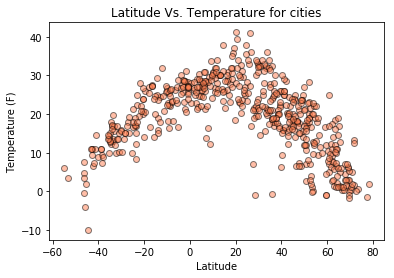

In [108]:
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude Vs. Temperature for cities")
plt.scatter(cityweather_df.Latitude, cityweather_df.Temperature, alpha = 0.5, color = 'coral', marker = "o", edgecolors="black", linewidth = 1)
plt.savefig("weatherplottemp.png")
plt.show()

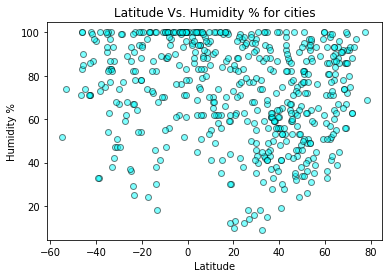

In [101]:
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude Vs. Humidity % for cities")
plt.scatter(cityweather_df.Latitude, cityweather_df.Humidity, alpha = 0.5, color = 'cyan', marker = "o", edgecolors="black", linewidth = 1)
plt.savefig("weatherplothumidity.png")
plt.show()

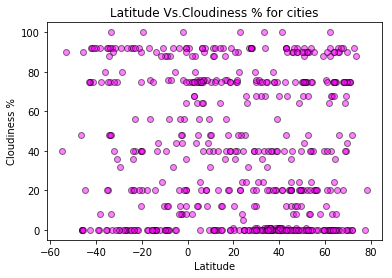

In [104]:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude Vs.Cloudiness % for cities")
plt.scatter(cityweather_df.Latitude, cityweather_df.Cloudiness, alpha = 0.5, color = 'magenta', marker = "o", edgecolors="black", linewidth = 1)
plt.savefig("weatherplotcloudiness.png")
plt.show()

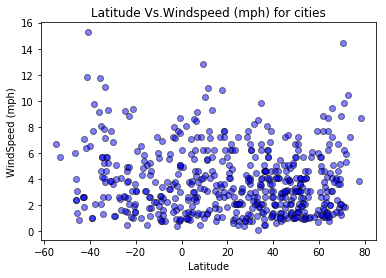

In [107]:
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (mph)")
plt.title("Latitude Vs.Windspeed (mph) for cities")
plt.scatter(cityweather_df.Latitude, cityweather_df["Wind Speed"], alpha = 0.5, color = 'blue', marker = "o", edgecolors="black", linewidth = 1)
plt.savefig("weatherplotwindspeed.png")
plt.show()

Three observable trends based on the data are:
1)  The temperature of the cities starts raising below the equator, peaking at 20degrees latitutde and then starts falling down thereafter. 
2)  The Humidity at 100% is highest at the equator with more cities concentrating at peak humidity at/near the equator
3) The distance from the equator does'nt seem to affect the cloudiness of the cities observed. The position of the cities from the equator does'nt seem to influence the windspeed.


    